In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
df = pd.read_csv('data/Dead-Reackoning-Processed.csv')
X = pd.unique(df['utm-easting'].astype(int)// 10)
Y = pd.unique(df['utm-northing'].astype(int)// 10)

result = np.meshgrid(X, Y)
pairs = np.transpose(np.reshape(result, (2, -1)))
d = {tuple(pair): 0 for pair in pairs}

X1 = df['utm-easting'].astype(int)// 10
Y1 = df['utm-northing'].astype(int)// 10

for i in range(len(X1)):
    d[X1[i], Y1[i]] += 1




In [28]:
print(len(d))
d = {k: v for k, v in d.items() if v != 0}
len(d)

84942


9154

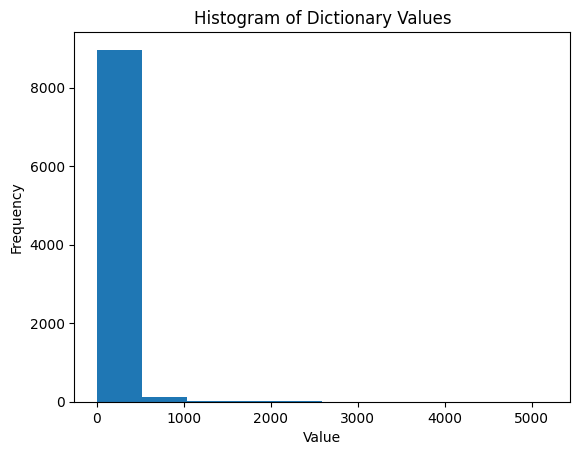

In [30]:
import matplotlib.pyplot as plt

# create a sample dictionary
d
# create a histogram of the dictionary values
plt.hist(d.values())

# set the x-axis label
plt.xlabel('Value')

# set the y-axis label
plt.ylabel('Frequency')

# set the plot title
plt.title('Histogram of Dictionary Values')

# display the plot
plt.show()


In [31]:
d

{(62779, 101333): 1849,
 (62782, 101333): 472,
 (62781, 101333): 503,
 (62775, 101333): 19,
 (62774, 101333): 106,
 (62776, 101333): 5,
 (62777, 101333): 102,
 (62772, 101333): 20,
 (62773, 101333): 118,
 (62788, 101333): 3,
 (62753, 101333): 12,
 (62754, 101333): 22,
 (62758, 101333): 48,
 (62789, 101333): 15,
 (62787, 101333): 33,
 (62786, 101333): 53,
 (62790, 101333): 3,
 (62785, 101333): 180,
 (62784, 101333): 877,
 (62783, 101333): 1219,
 (62780, 101333): 972,
 (62778, 101333): 522,
 (62793, 101333): 2,
 (62771, 101333): 14,
 (62770, 101333): 21,
 (62752, 101333): 3,
 (62761, 101333): 147,
 (62763, 101333): 7,
 (62839, 101333): 3,
 (62838, 101333): 12,
 (62835, 101333): 1,
 (62836, 101333): 1,
 (62769, 101333): 34,
 (62765, 101333): 2,
 (62764, 101333): 4,
 (62791, 101333): 3,
 (62768, 101333): 20,
 (62767, 101333): 17,
 (62766, 101333): 2,
 (62747, 101333): 8,
 (62734, 101333): 2,
 (62748, 101333): 2,
 (62757, 101333): 16,
 (62762, 101333): 29,
 (62760, 101333): 454,
 (62756, 10

In [1]:
import pandas as pd
import numpy as np


In [26]:
df = pd.read_csv('data/Dead-Reackon-Sample-1.csv')
df

,index,Unnamed: 0,location-lat,location-long,lat-diff,long-diff,timestamp,individual-local-identifier,utm-easting,utm-northing,zone_number,zone_letter,date_string
0,0,1,9.165251,-79.836838,0.000016,0.000018,2022-07-07 22:07:07.000,Daniel,627797.657570,1.013329e+06,17,P,2022-07-07
1,1,2,9.165222,-79.836564,0.000028,0.000273,2022-07-07 22:08:13.000,Daniel,627827.710368,1.013325e+06,17,P,2022-07-07
2,2,3,9.165467,-79.836666,0.000245,0.000102,2022-07-07 22:09:10.000,Daniel,627816.425425,1.013353e+06,17,P,2022-07-07
3,3,6,9.158810,-79.837279,0.006647,0.000680,2022-07-11 15:31:27.000,Daniel,627751.433917,1.012616e+06,17,P,2022-07-11
4,4,9,9.158835,-79.837318,0.000024,0.000041,2022-07-11 15:33:45.000,Daniel,627747.161219,1.012619e+06,17,P,2022-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99866,99866,498794,9.158638,-79.834687,0.000011,0.000013,2022-10-02 11:26:49.000,Olenna Tyrell,628036.312398,1.012598e+06,17,P,2022-10-02
99867,99867,498796,9.158738,-79.834374,0.000091,0.000320,2022-10-02 11:28:41.000,Olenna Tyrell,628070.737027,1.012609e+06,17,P,2022-10-02
99868,99868,498798,9.158716,-79.834396,0.000014,0.000010,2022-10-02 11:28:43.000,Olenna Tyrell,628068.305692,1.012607e+06,17,P,2022-10-02
99869,99869,498802,9.158481,-79.834471,0.000214,0.000062,2022-10-02 11:32:06.000,Olenna Tyrell,628060.126312,1.012581e+06,17,P,2022-10-02


In [39]:
df['trajectory-finder'] = df.groupby('date_string').ngroup()


In [43]:
df.to_csv('data/Dead-Reackon-Sample-1.csv')

In [12]:
a = '''
 <div class="form-check">
    <input
            class="form-check-input"
            type="checkbox"
            value=""
            id="{}"
    />
    <label class="form-check-label" for="{}"> {} </label>
</div>
 '''.format('')
    

In [22]:
name =   ["Daniel",
  "Magnolia",
  "Jessy",
  "Drogon",
  "Viserion",
  "Rhaegal",
  "John",
  "Rhaegal_2",
  "Viserion_2",
  "Samwell",
  "Gendry",
  "Gendry_2",
  "Daenerys",
  "Olenna"]

color = [  "#1abc9c",
  "#16a085",
  "#2ecc71",
  "#27ae60",
  "#3498db",
  "#2980b9",
  "#9b59b6",
  "#8e44ad",
  "#f1c40f",
  "#f39c12",
  "#e67e22",
  "#d35400",
  "#e74c3c",
  "#c0392b"]

In [36]:
for i in range(14):
    a = '''
       { label: {}, checked: document.getElementbyId({}).checked }

 '''.format(name[i], name[i])
    
    print(a)

KeyError: ' label'

In [35]:

name =   ["Daniel",
  "Magnolia",
  "Jessy",
  "Drogon",
  "Viserion",
  "Rhaegal",
  "John",
  "Rhaegal_2",
  "Viserion_2",
  "Samwell",
  "Gendry",
  "Gendry_2",
  "Daenerys",
  "Olenna"]

for n in name:
    a = f'''
    { label: {n}, checked: document.getElementbyId({n}).checked }
    '''

    print(a)


NameError: name 'label' is not defined

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/Dead-Reackon-Sample-1.csv')

In [55]:
df

,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0,location-lat,location-long,lat-diff,long-diff,timestamp,individual-local-identifier,utm-easting,utm-northing,zone_number,zone_letter,date_string,trajectory-finder,random_col,random_column
0,0,0,0,1,9.165251,-79.836838,0.000016,0.000018,2022-07-07 22:07:07.000,Daniel,627797.657570,1.013329e+06,17,P,2022-07-07,0,92,59
1,1,1,1,2,9.165222,-79.836564,0.000028,0.000273,2022-07-07 22:08:13.000,Daniel,627827.710368,1.013325e+06,17,P,2022-07-07,0,92,51
2,2,2,2,3,9.165467,-79.836666,0.000245,0.000102,2022-07-07 22:09:10.000,Daniel,627816.425425,1.013353e+06,17,P,2022-07-07,0,92,39
3,3,3,3,6,9.158810,-79.837279,0.006647,0.000680,2022-07-11 15:31:27.000,Daniel,627751.433917,1.012616e+06,17,P,2022-07-11,1,92,70
4,4,4,4,9,9.158835,-79.837318,0.000024,0.000041,2022-07-11 15:33:45.000,Daniel,627747.161219,1.012619e+06,17,P,2022-07-11,1,92,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99866,99866,99866,99866,498794,9.158638,-79.834687,0.000011,0.000013,2022-10-02 11:26:49.000,Olenna Tyrell,628036.312398,1.012598e+06,17,P,2022-10-02,72,92,68
99867,99867,99867,99867,498796,9.158738,-79.834374,0.000091,0.000320,2022-10-02 11:28:41.000,Olenna Tyrell,628070.737027,1.012609e+06,17,P,2022-10-02,72,92,45
99868,99868,99868,99868,498798,9.158716,-79.834396,0.000014,0.000010,2022-10-02 11:28:43.000,Olenna Tyrell,628068.305692,1.012607e+06,17,P,2022-10-02,72,92,54
99869,99869,99869,99869,498802,9.158481,-79.834471,0.000214,0.000062,2022-10-02 11:32:06.000,Olenna Tyrell,628060.126312,1.012581e+06,17,P,2022-10-02,72,92,20


In [50]:
import random
df['random_column'] = (100*np.random.rand(len(df))).astype(int)

In [52]:
df.to_csv('data/Dead-Reackon-Sample-1.csv')

In [ ]:
### Building clusters example
# Step 1: Extract a subset D' of objects from D
D_prime = df.to_numpy()

# Step 2: Apply a density-based clustering algorithm
# You can use a library like scikit-learn, which provides various clustering algorithms, such as DBSCAN or HDBSCAN.
from sklearn.cluster import DBSCAN
clusterer = DBSCAN(eps=..., min_samples=4000)
labels = clusterer.fit_predict(D_prime)

# Step 3: Select prototypes for each cluster
prototypes = {}
for i in range(len(set(labels))):
    cluster_indices = np.where(labels == i)[0]
    cluster_points = D_prime[cluster_indices]
    # You can use a library like scipy, which provides distance functions, such as euclidean or cosine.
    from scipy.spatial.distance import euclidean
    distances = euclidean_distances(cluster_points)
    # You can choose q prototypes as the q points with the highest average pairwise distance.
    q = ...
    prototype_indices = np.argsort(np.mean(distances, axis=1))[:q]
    prototypes[i] = cluster_points[prototype_indices]

# Step 4: Visual inspection and refinement
# You can use various visualization libraries, such as matplotlib or plotly, to plot the clusters and prototypes and visually inspect them.
# You can also manually adjust the clusters and prototypes if necessary.

# Step 5: Apply the classifier to the remaining objects in D
# You can use the same distance function and thresholds as in Step 3 to assign each object to a cluster.
# You can use a library like numpy, which provides vectorized operations for efficient computation.
unclassified_indices = np.arange(len(D))
for i, pi in prototypes.items():
    distances_to_pi = euclidean_distances(D[unclassified_indices], pi.reshape(1, -1)).squeeze()
    close_indices = np.where(distances_to_pi < epsilon_i)[0]
    if len(close_indices) == 1:
        cluster_indices = np.where(labels == i)[0]
        D[unclassified_indices[close_indices]] = cluster_indices[np.argmin(euclidean_distances(cluster_points, D[unclassified_indices[close_indices]].reshape(1, -1)).squeeze())]
    elif len(close_indices) > 1:
        distances_to_pik = euclidean_distances(D[unclassified_indices[close_indices]], prototypes[np.argmin(distances_to_pi[close_indices])].reshape(1, -1)).squeeze()
        cluster_indices = np.where(labels == i)[0]
        D[unclassified_indices[close_indices]] = cluster_indices[np.argmin(euclidean_distances(cluster_points, D[unclassified_indices[close_indices]].reshape(1, -1)).squeeze())]
    unclassified_indices = np.setdiff1d(unclassified_indices, close_indices)

# Step 6: Possibly exclude members of clusters and restart the whole process again
# You can use the same procedure as in Step 1 to extract a new subset of objects and repeat the algorithm.


In [63]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [3]:
import pandas as pd
import numpy as np 
df = pd.read_csv('data/Dead-Reackon-Sample-1.csv')

In [8]:
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)

In [10]:
df.drop(['random_col', 'random_column'], axis = 1, inplace = True)

In [11]:
df

,index,location-lat,location-long,lat-diff,long-diff,timestamp,individual-local-identifier,utm-easting,utm-northing,zone_number,zone_letter,date_string,trajectory-finder
0,0,9.165251,-79.836838,0.000016,0.000018,2022-07-07 22:07:07.000,Daniel,627797.657570,1.013329e+06,17,P,2022-07-07,0
1,1,9.165222,-79.836564,0.000028,0.000273,2022-07-07 22:08:13.000,Daniel,627827.710368,1.013325e+06,17,P,2022-07-07,0
2,2,9.165467,-79.836666,0.000245,0.000102,2022-07-07 22:09:10.000,Daniel,627816.425425,1.013353e+06,17,P,2022-07-07,0
3,3,9.158810,-79.837279,0.006647,0.000680,2022-07-11 15:31:27.000,Daniel,627751.433917,1.012616e+06,17,P,2022-07-11,1
4,4,9.158835,-79.837318,0.000024,0.000041,2022-07-11 15:33:45.000,Daniel,627747.161219,1.012619e+06,17,P,2022-07-11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22946,22946,9.161581,-79.837005,0.000011,0.000002,2022-08-18 05:18:11.000,Drogon,627780.552708,1.012923e+06,17,P,2022-08-18,27
22947,22947,9.161646,-79.837038,0.000065,0.000033,2022-08-18 05:20:08.000,Drogon,627776.958096,1.012930e+06,17,P,2022-08-18,27
22948,22948,9.162062,-79.836936,0.000426,0.000079,2022-08-18 05:22:06.000,Drogon,627787.962826,1.012976e+06,17,P,2022-08-18,27
22949,22949,9.162038,-79.836930,0.000024,0.000007,2022-08-18 05:22:07.000,Drogon,627788.696583,1.012973e+06,17,P,2022-08-18,27


In [39]:
import pandas as pd
from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371 # Radius of the earth in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dLon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

def calculate_speed(df):
    # Calculate the distance between each consecutive pair of coordinates
    distances = [haversine(df['location-lat'].iloc[i], df['location-long'].iloc[i], df['location-lat'].iloc[i+1], df['location-long'].iloc[i+1]) for i in range(len(df)-1)]
    
    # Calculate the time elapsed between each consecutive pair of timestamps
    times = [(df['timestamp'].iloc[i+1] - df['timestamp'].iloc[i]).total_seconds() for i in range(len(df)-1)]
    
    # Calculate the speed for each consecutive pair of coordinates
    speeds = [distances[i] / times[i] * 3600 for i in range(len(distances))]
    speeds.insert(0, 0) # Add a zero speed value for the first row of the DataFrame
    
    return speeds

def calculate_acceleration(df):
    # Calculate the speed for each consecutive pair of coordinates
    speeds = calculate_speed(df)
    
    # Calculate the time elapsed between each consecutive pair of timestamps
    times = [(df['timestamp'].iloc[i+1] - df['timestamp'].iloc[i]).total_seconds() for i in range(len(df)-1)]
    
    # Calculate the acceleration for each consecutive pair of coordinates
    accelerations = [(speeds[i+1] - speeds[i]) / times[i] for i in range(len(speeds)-1)]
    accelerations.insert(0, 0) # Add a zero acceleration value for the first row of the DataFrame
    
    return accelerations

def calculate_turning_angle(df):
   # Calculate bearings
    bearings = [atan2(sin(radians(df['location-long'].iloc[i+1] - df['location-long'].iloc[i])) * cos(radians(df['location-lat'].iloc[i+1])), 
              cos(radians(df['location-lat'].iloc[i])) * sin(radians(df['location-lat'].iloc[i+1])) - sin(radians(df['location-lat'].iloc[i])) * cos(radians(df['location-lat'].iloc[i+1])) * cos(radians(df['location-long'].iloc[i+1] - df['location-long'].iloc[i])))
            for i in range(len(df)-1)]
    bearings.append(bearings[-1])  # Add last bearing to the list

    # Calculate the turning angle between each consecutive pair of bearings
    turning_angles = [0] # Add a zero turning angle value for the first row of the DataFrame
    for i in range(1, len(bearings)):
        turning_angle = abs(bearings[i] - bearings[i-1])
        if turning_angle > 180:
            turning_angle = 360 - turning_angle
        turning_angles.append(turning_angle)
    
    return turning_angles




In [41]:
# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate speed, acceleration, and turning angle
df['speed'] = calculate_speed(df)
df['acceleration'] = calculate_acceleration(df)
df['turning_angle'] = calculate_turning_angle(df)

In [47]:
df.to_csv('data/Dead-Reackon-Sample-1.csv')

In [48]:
df_sample = df.sample(n = 2000)
df_sample.to_csv('data/Dead-Reackon-Sample-2.csv')